In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/workspaces/Practise-Code/Kaggle Project/Data/df_no_outliers.csv')

df.rename(columns={'date': 'date'}, inplace=True)

df['date'] = pd.to_datetime(df['date'])
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
Index: 19430 entries, 15924 to 8274
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             19430 non-null  int64         
 1   date           19430 non-null  datetime64[ns]
 2   price          19430 non-null  float64       
 3   bedrooms       19430 non-null  int64         
 4   bathrooms      19430 non-null  float64       
 5   sqft_living    19430 non-null  int64         
 6   sqft_lot       19430 non-null  int64         
 7   floors         19430 non-null  float64       
 8   waterfront     19430 non-null  int64         
 9   view           19430 non-null  int64         
 10  condition      19430 non-null  int64         
 11  grade          19430 non-null  int64         
 12  sqft_above     19430 non-null  int64         
 13  sqft_basement  19430 non-null  int64         
 14  yr_built       19430 non-null  int64         
 15  yr_renovated   19430 

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,month,decade_built
15924,7533800170,2014-07-07,1636000.0,3,2.50,3110,6765,2.0,0,1,...,560,1946,0,98115,47.6886,-122.276,2630,7626,7,1940
17324,9809000010,2015-01-06,1629000.0,5,2.50,3090,16583,2.0,0,0,...,0,1964,0,98004,47.6458,-122.218,3740,17853,1,1960
14233,5318101565,2014-07-03,1625000.0,4,3.25,2980,3600,2.0,0,0,...,830,1999,0,98112,47.6352,-122.284,2980,4800,7,1990
11843,2450500060,2014-08-26,1620000.0,4,3.25,3820,8114,2.0,0,0,...,0,2005,0,98004,47.5837,-122.194,2440,9195,8,2000
16268,3025300250,2015-05-13,1620000.0,4,2.25,2350,17709,2.0,0,0,...,0,1977,0,98039,47.6232,-122.236,3360,19855,5,1970


<Axes: >

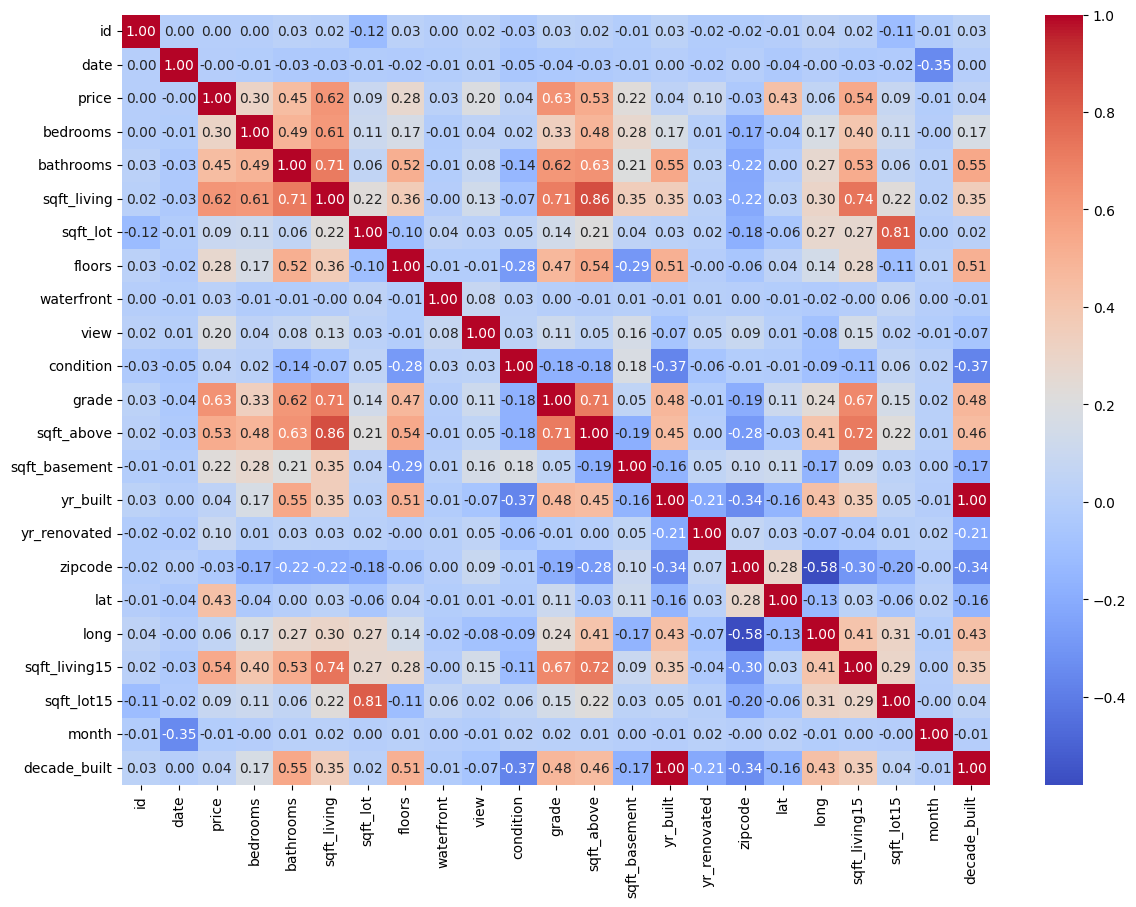

In [4]:
import seaborn as sns
corr_matrix = df.corr()

plt.figure(figsize=(14, 10))

sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', annot_kws={"size": 10})

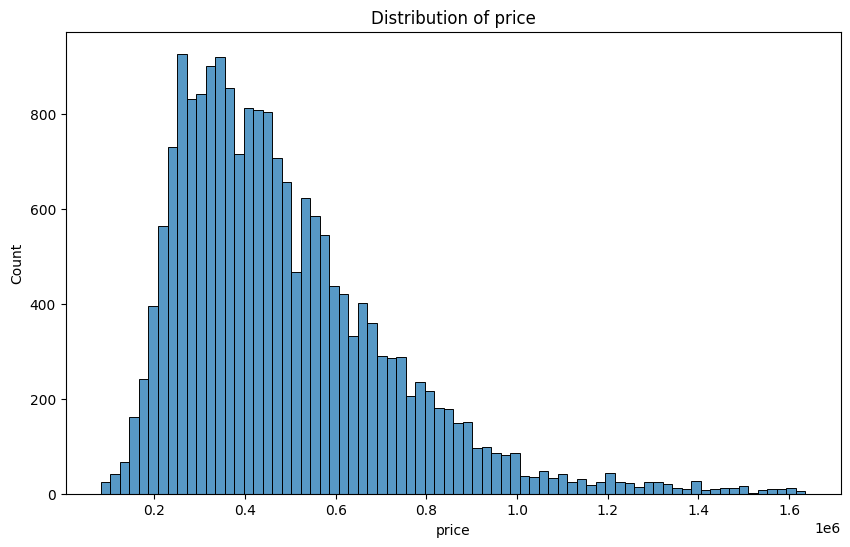

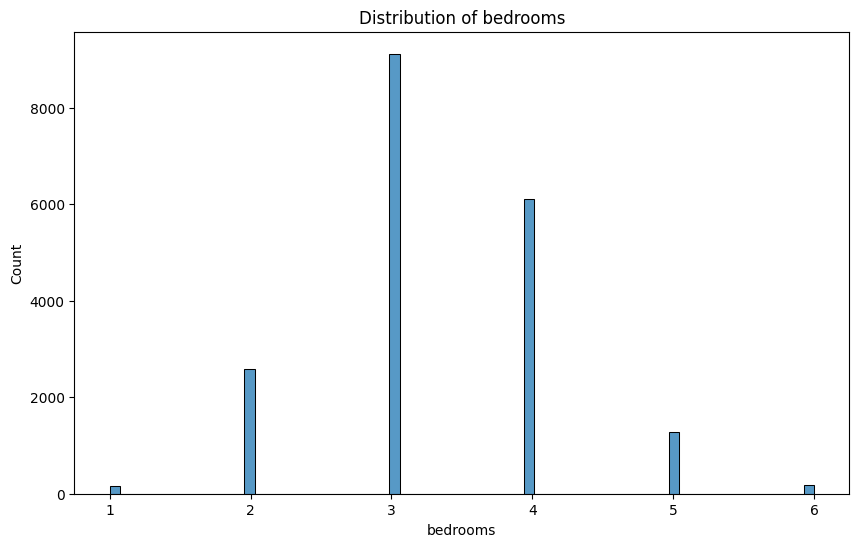

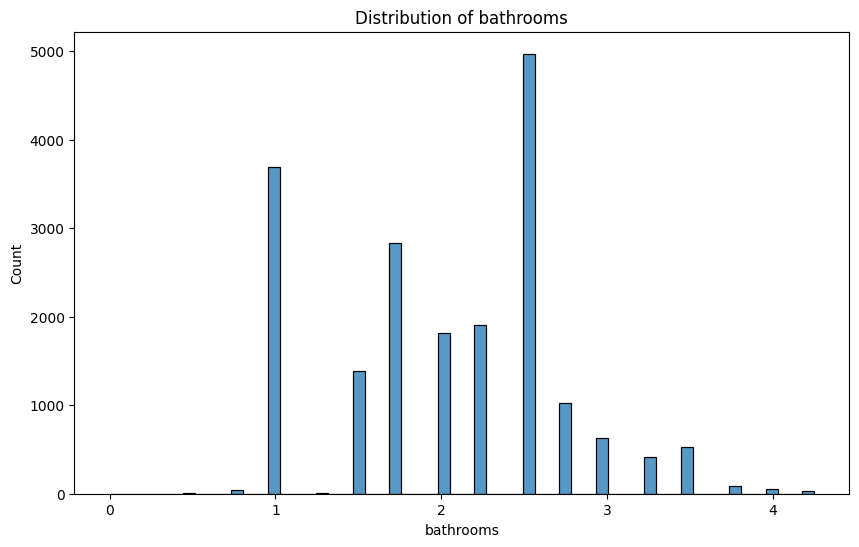

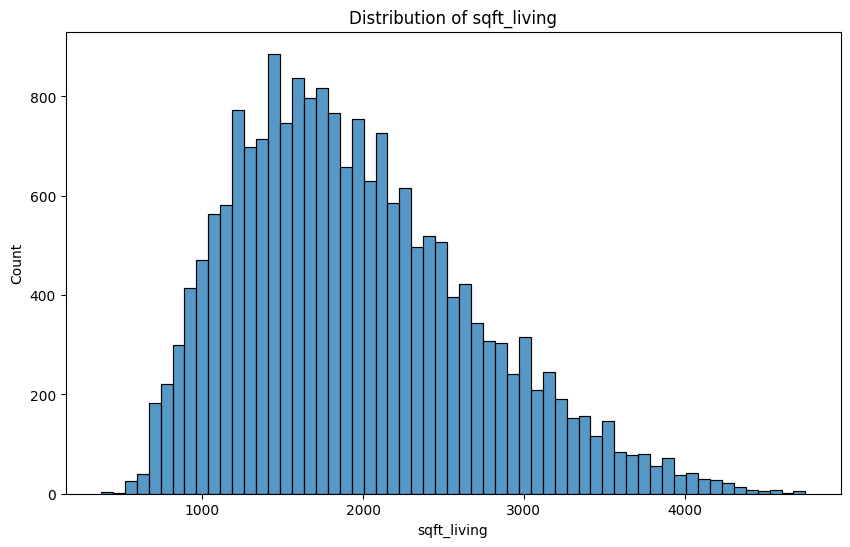

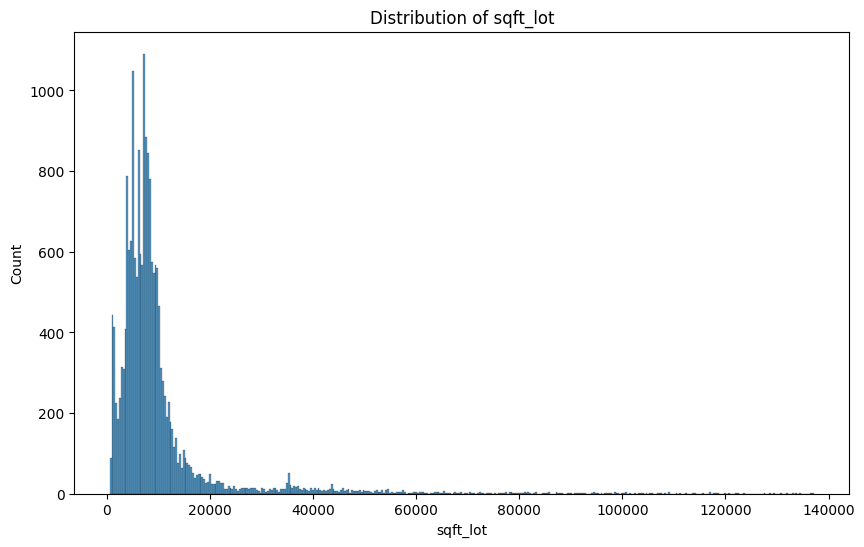

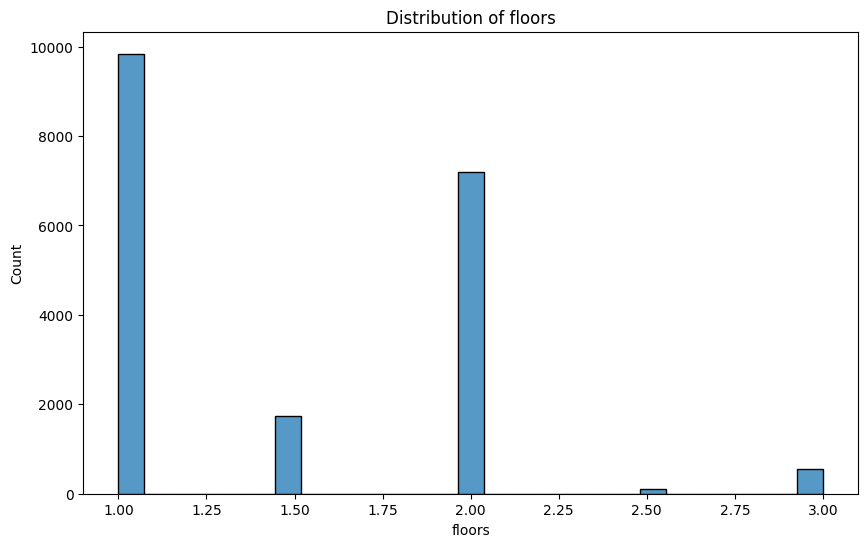

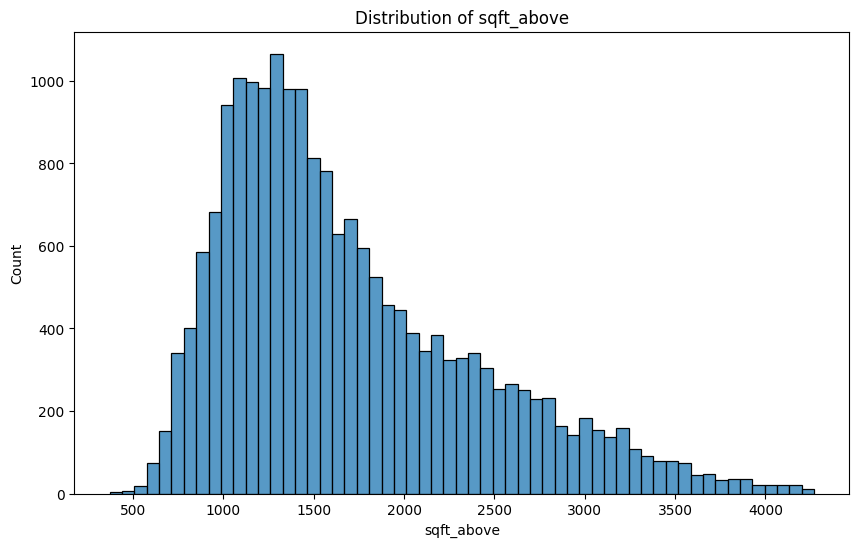

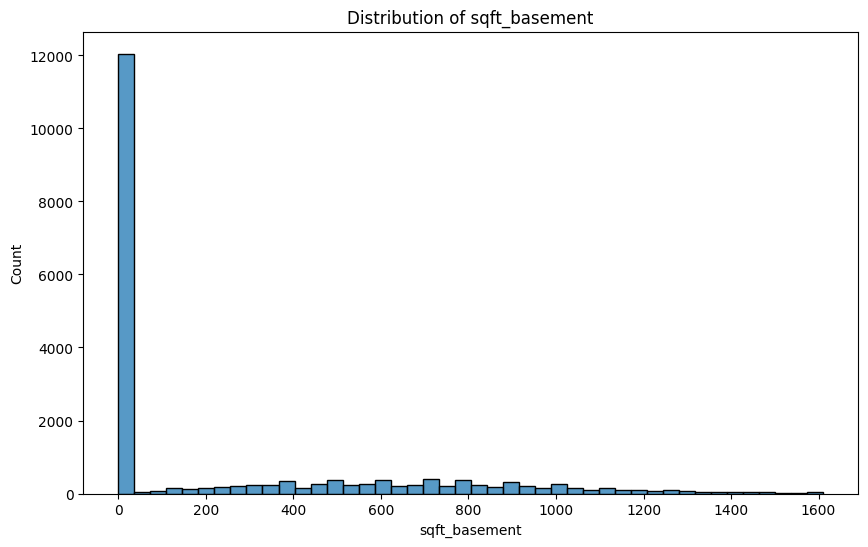

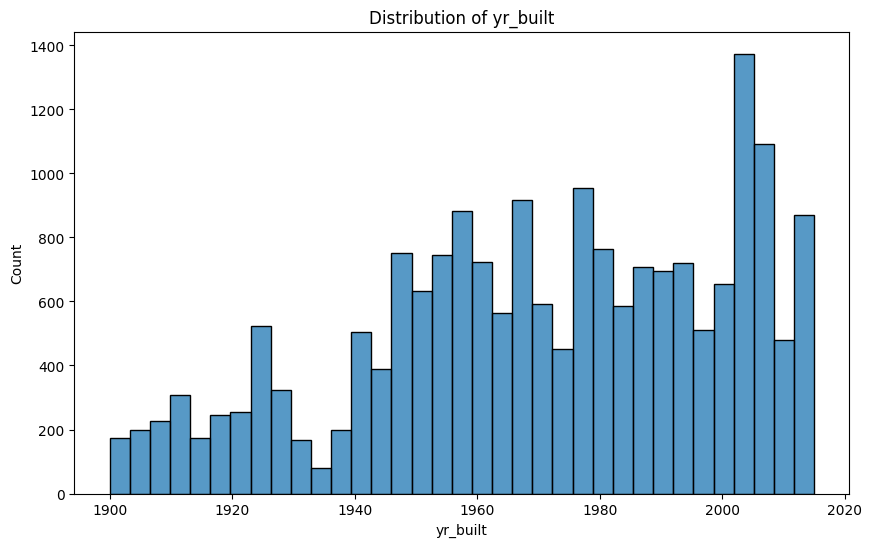

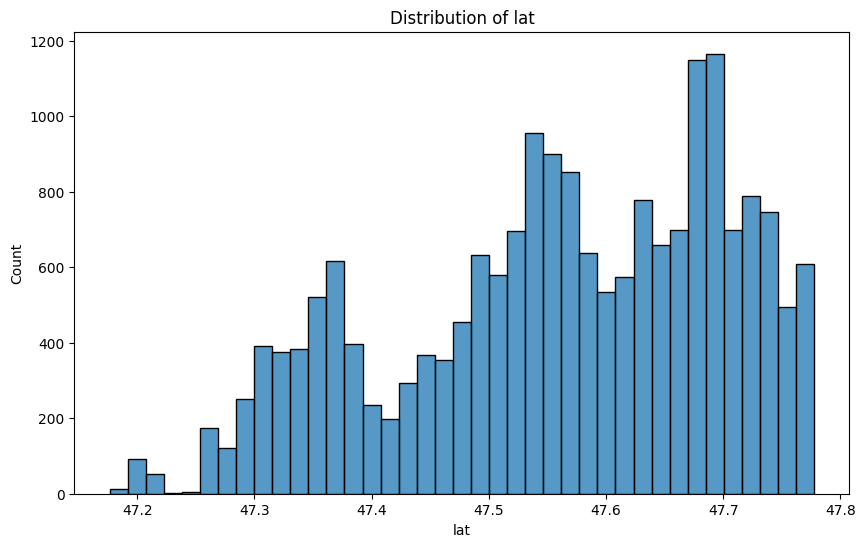

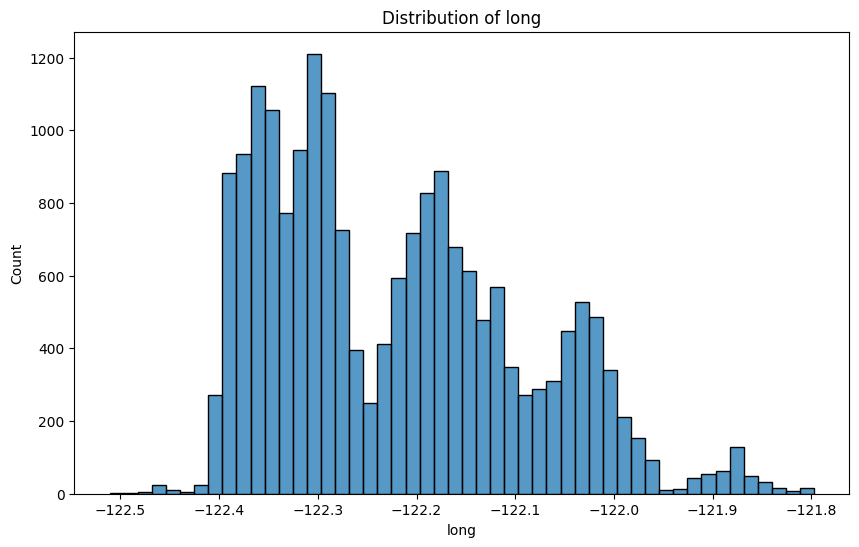

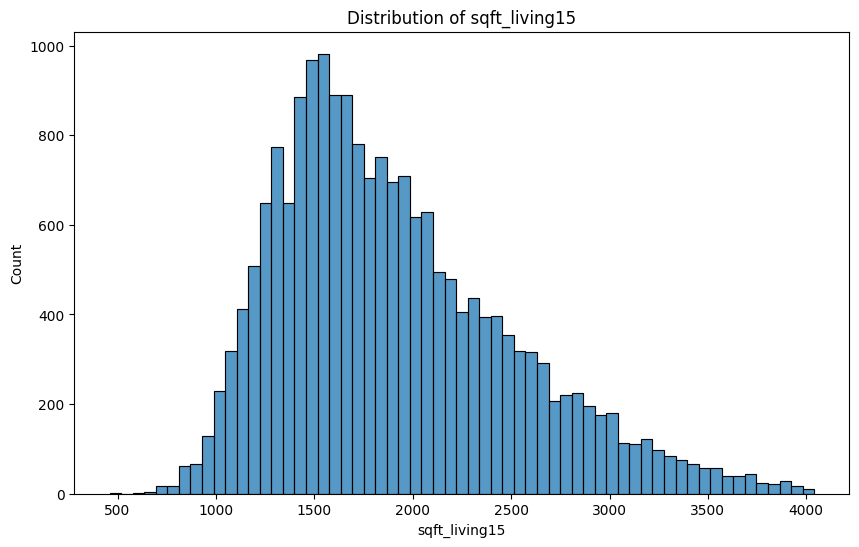

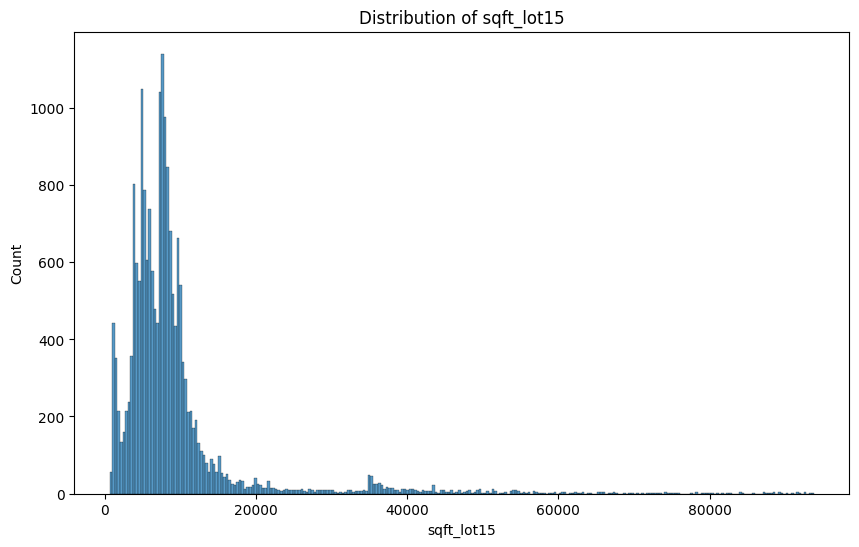

In [5]:
numeric_cols = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
                'sqft_above', 'sqft_basement', 'yr_built', 'lat', 'long', 
                'sqft_living15', 'sqft_lot15']

for col in numeric_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(df[col], kde=False)
    plt.title(f'Distribution of {col}')
    plt.show()



**FOR ABOVE SEE IF YOU CAN SWITCH DATE FROM A MEASUREMENT FROM START DATE TO END DATE**

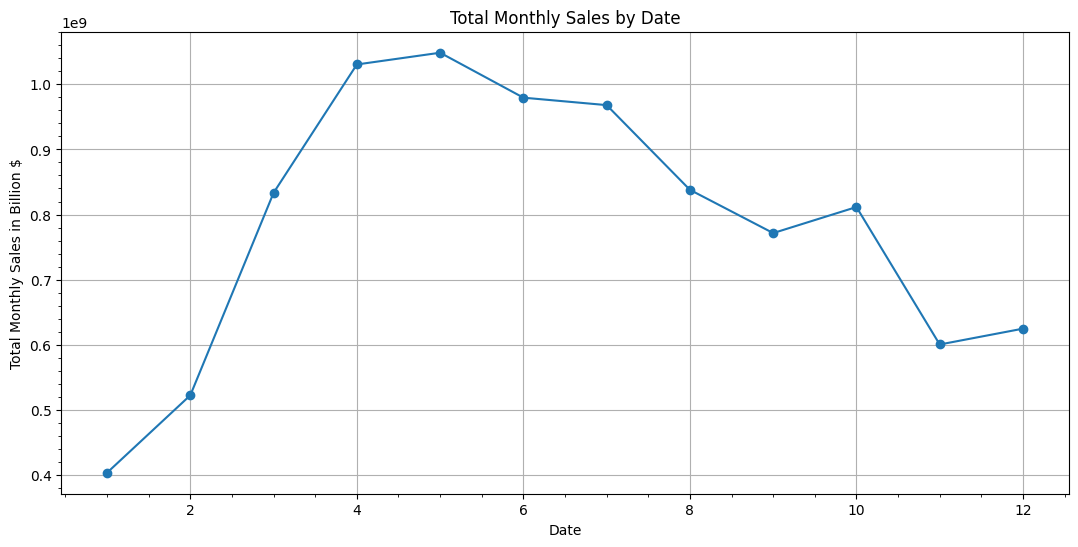

In [6]:
df_sales_by_month = df.groupby('month')['price'].sum().reset_index()

plt.figure(figsize=(13, 6))
plt.plot(df_sales_by_month['month'], df_sales_by_month['price'], marker='o')
plt.xlabel('Date')
plt.ylabel('Total Monthly Sales in Billion $')
plt.title('Total Monthly Sales by Date')
plt.grid(True)
plt.minorticks_on()
plt.show()



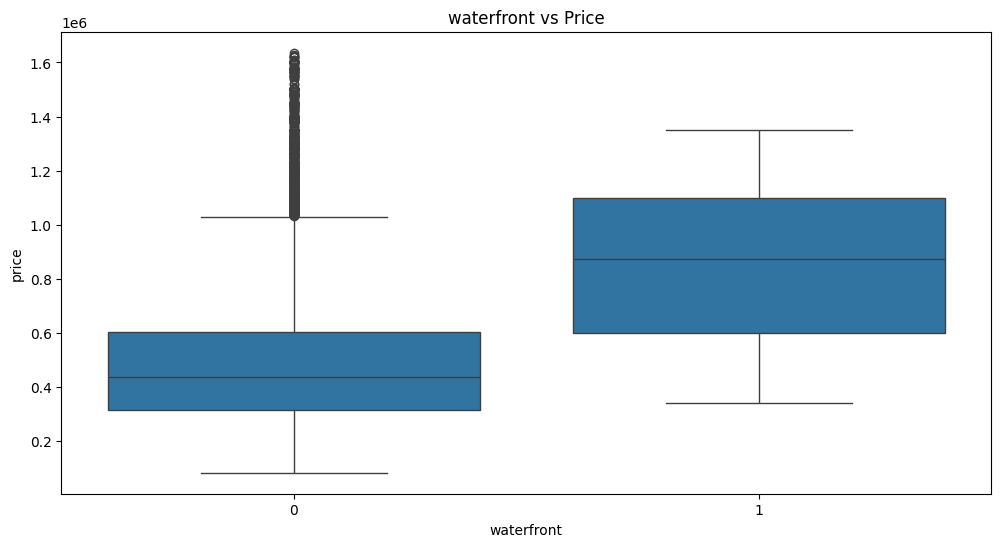

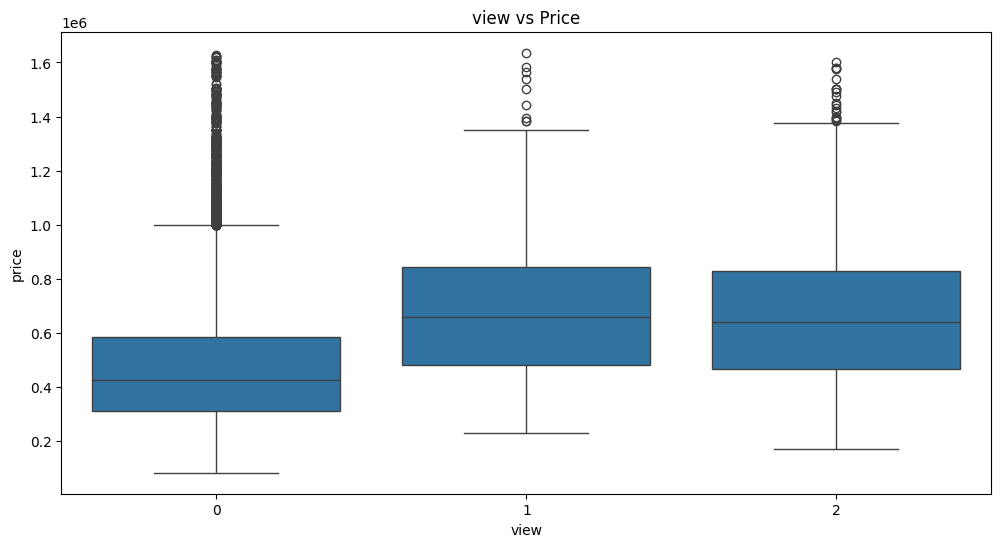

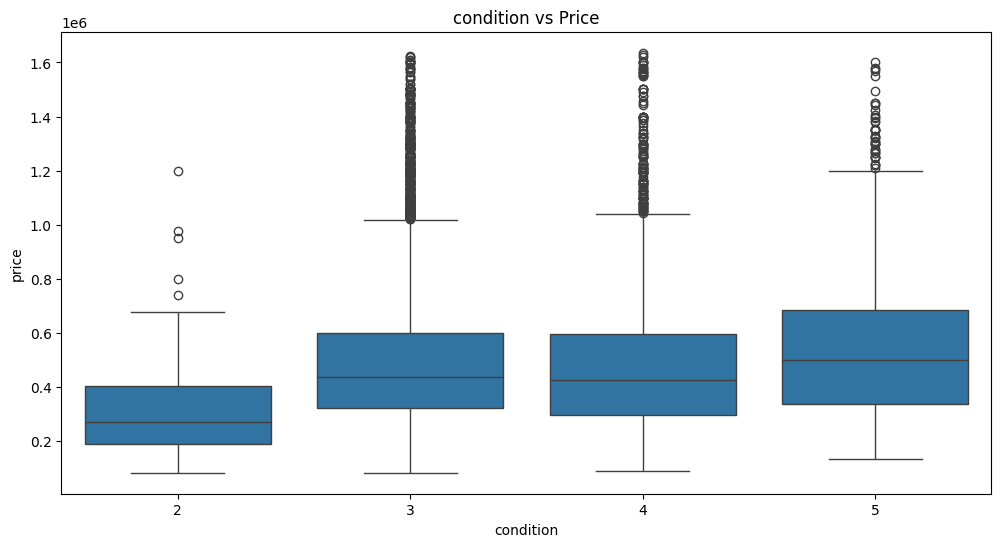

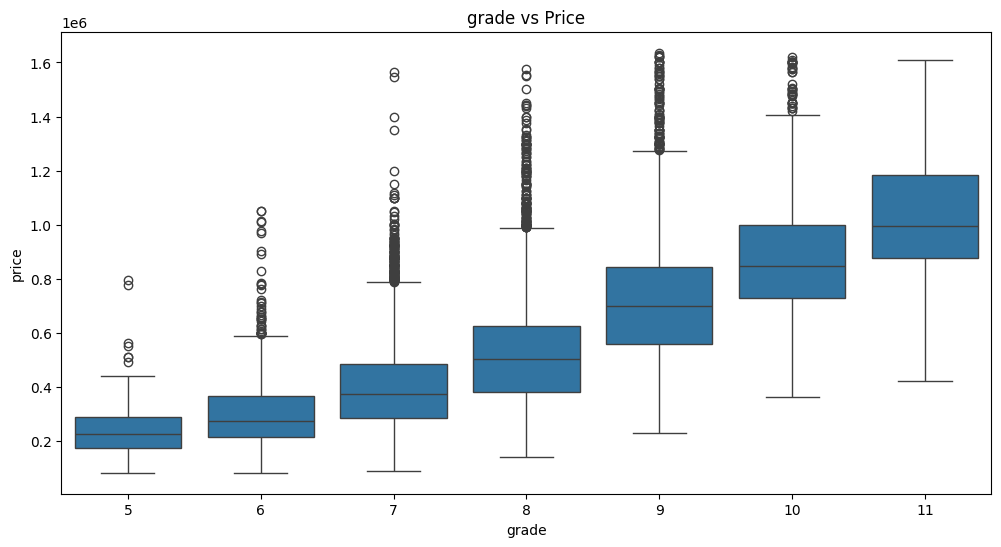

In [7]:
categorical_cols = ['waterfront', 'view', 'condition', 'grade']

for col in categorical_cols:
    plt.figure(figsize=(12, 6))
    sns.boxplot(x=col, y='price', data=df)
    plt.title(f'{col} vs Price')
    plt.show()


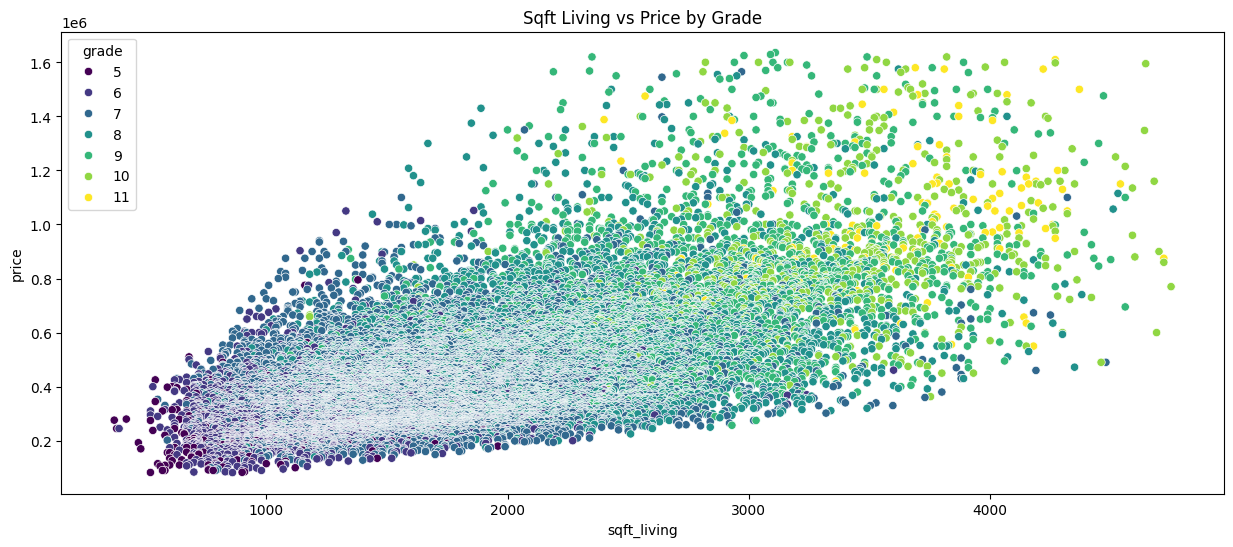

In [8]:
plt.figure(figsize=(15, 6))
sns.scatterplot(x='sqft_living', y='price', hue='grade', palette='viridis', data=df)
plt.title('Sqft Living vs Price by Grade')
plt.show()




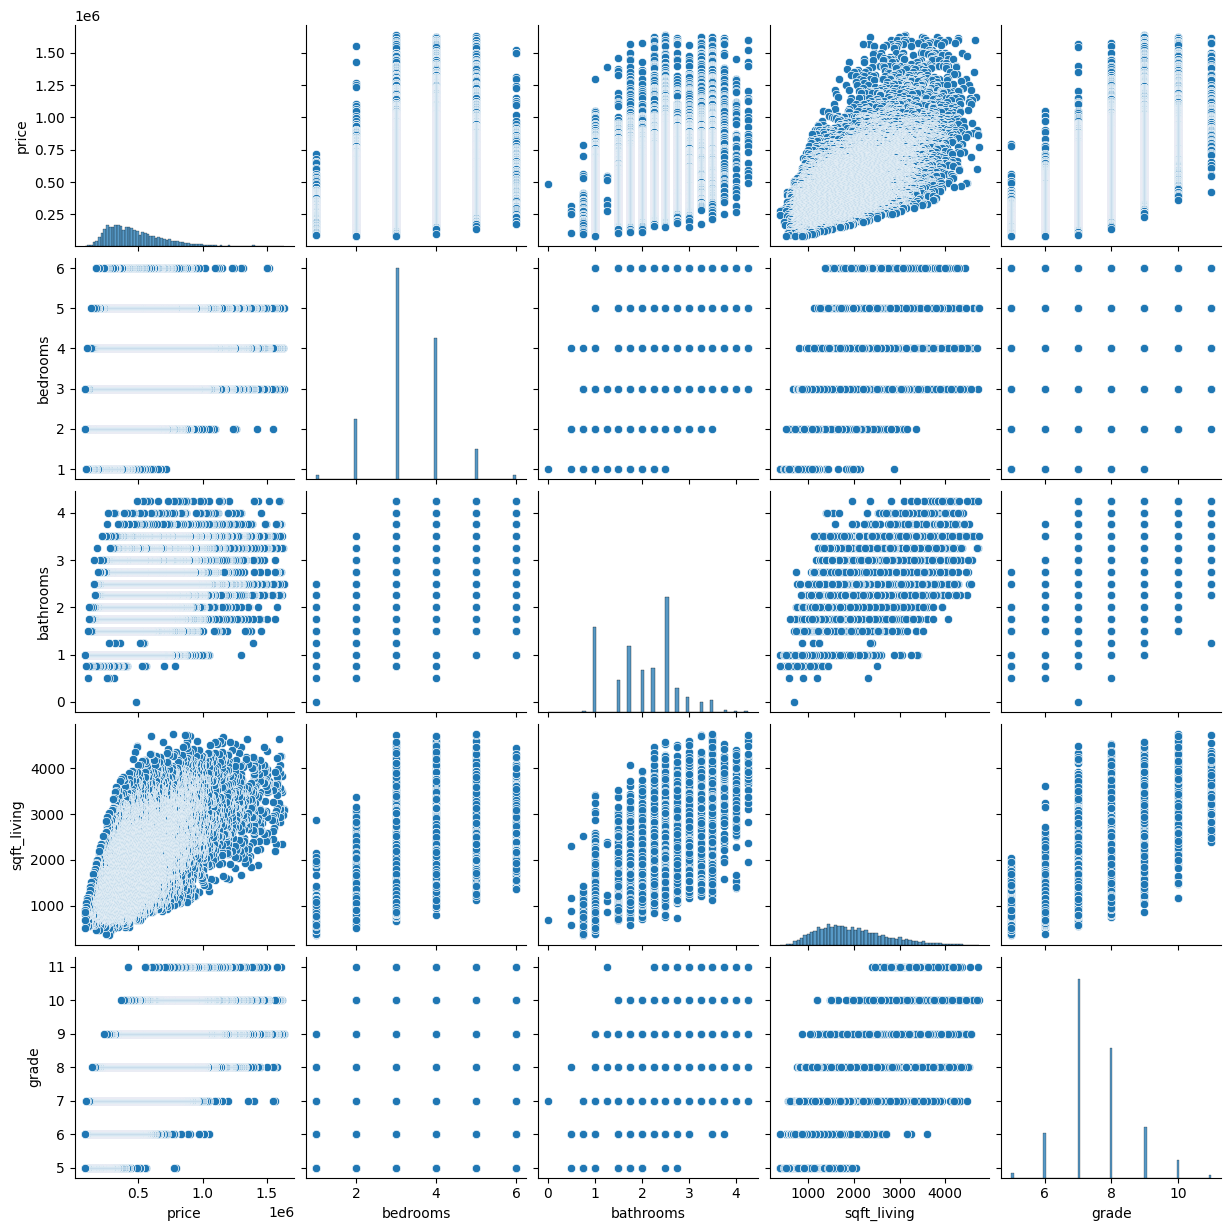

In [9]:
sns.pairplot(df[['price', 'bedrooms', 'bathrooms', 'sqft_living', 'grade']])
plt.show()


/tmp/ipykernel_5610/2073489943.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_renovated['decade'] = (df_renovated['yr_renovated'] // 10) * 10


Text(0, 0.5, 'Average Price in Million $')

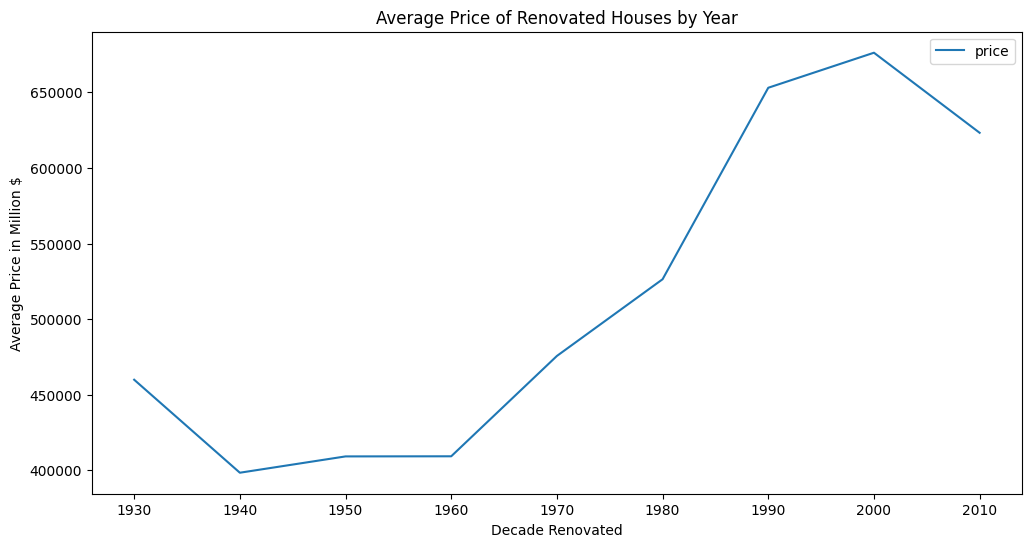

In [10]:
df_renovated = df[df['yr_renovated'] > 0] 
df_renovated['decade'] = (df_renovated['yr_renovated'] // 10) * 10
df_renovated_vs_price = df_renovated.groupby('decade')['price'].mean().reset_index()
df_renovated_vs_price.plot(x='decade', y='price', figsize=(12, 6))
plt.title('Average Price of Renovated Houses by Year')
plt.xlabel('Decade Renovated')
plt.ylabel('Average Price in Million $')


Text(0, 0.5, 'Price in $')

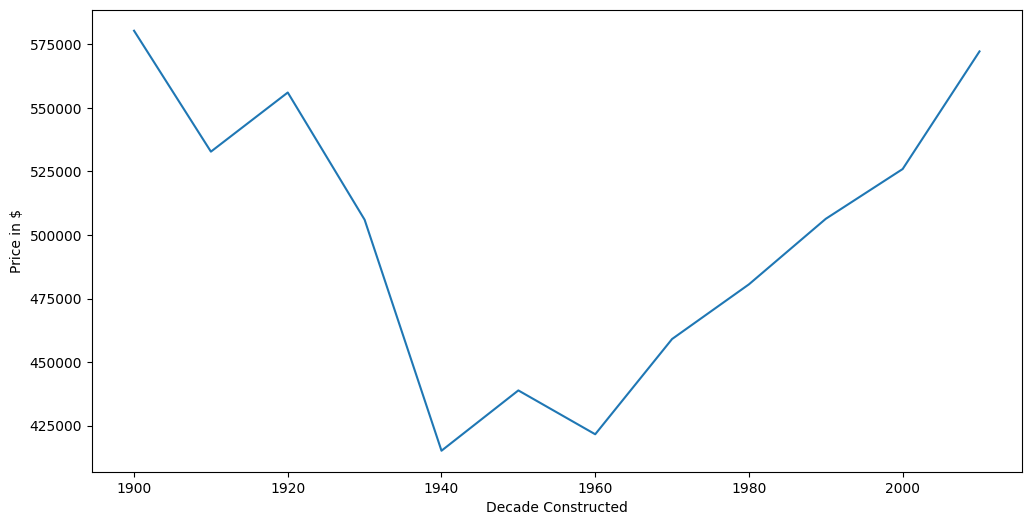

In [11]:
df_decade_built_average_price = df.groupby('decade_built')['price'].mean()
df_decade_built_average_price.plot(kind='line', figsize=(12, 6))
plt.xlabel('Decade Constructed')
plt.ylabel('Price in $')


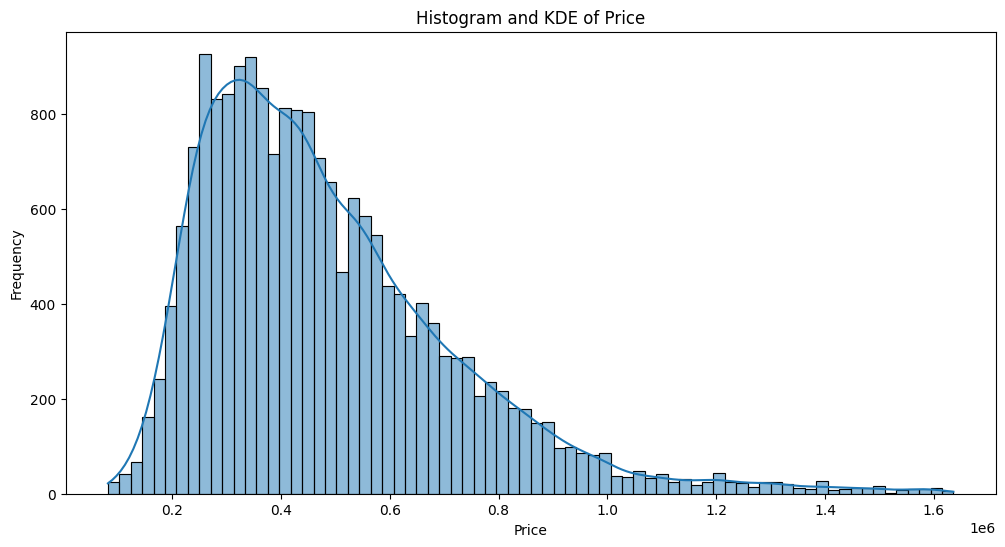

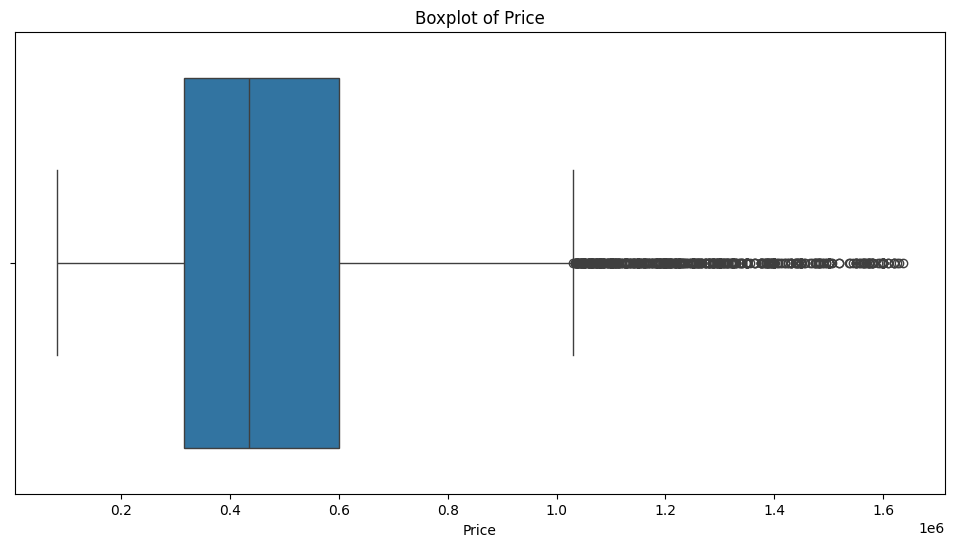

Summary Statistics of Price:
count    1.943000e+04
mean     4.854674e+05
std      2.353108e+05
min      8.200000e+04
25%      3.149500e+05
50%      4.350000e+05
75%      6.010015e+05
max      1.636000e+06
Name: price, dtype: float64
Skewness: 1.337373625596708
Kurtosis: 2.4772077390121225
Shapiro-Wilk Test: W=0.9081069486708176, p-value=2.5302707034831473e-74


/home/codespace/.local/lib/python3.10/site-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: scipy.stats.shapiro: For N > 5000, computed p-value may not be accurate. Current N is 19430.
  res = hypotest_fun_out(*samples, **kwds)


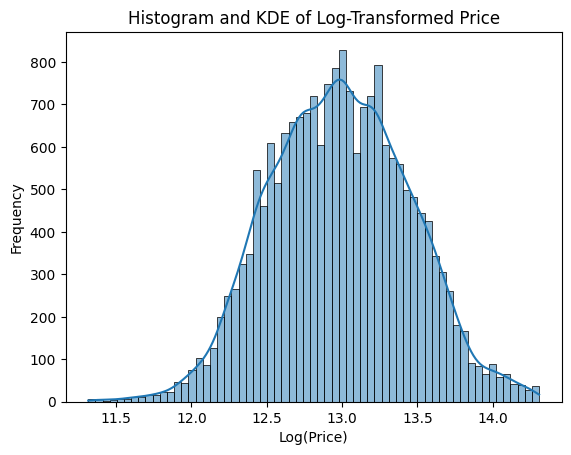

In [12]:
from scipy import stats

# Plot the histogram
plt.figure(figsize=(12, 6))
sns.histplot(df['price'], kde=True)
plt.title('Histogram and KDE of Price')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# Boxplot to check for outliers
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['price'])
plt.title('Boxplot of Price')
plt.xlabel('Price')
plt.show()

# Summary statistics
print("Summary Statistics of Price:")
print(df['price'].describe())

# Skewness and Kurtosis
print(f"Skewness: {df['price'].skew()}")
print(f"Kurtosis: {df['price'].kurt()}")

# Perform normality test (Shapiro-Wilk Test)
shapiro_test = stats.shapiro(df['price'])
print(f"Shapiro-Wilk Test: W={shapiro_test.statistic}, p-value={shapiro_test.pvalue}")

# Consider log transformation if skewed
if df['price'].skew() > 1:
    df['log_price'] = np.log1p(df['price'])
    sns.histplot(df['log_price'], kde=True)
    plt.title('Histogram and KDE of Log-Transformed Price')
    plt.xlabel('Log(Price)')
    plt.ylabel('Frequency')
    plt.show()